In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)


2.1.0
sys.version_info(major=3, minor=7, micro=1, releaselevel='final', serial=0)
matplotlib 3.0.2
numpy 1.18.1
pandas 1.0.1
sklearn 0.20.1
tensorflow 2.1.0
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [3]:
# x = (x - u) / std

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# x_train: [None, 28, 28] -> [None, 784]
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

In [9]:
# tf.keras.models.Sequential()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(10):
#     model.add(keras.layers.Dense(100, activation="relu"))
#     model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(100, activation="selu"))
    '''
    model.add(keras.layers.Dense(100))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('relu'))
    '''
model.add(keras.layers.AlphaDropout(rate=0.5))
model.add(keras.layers.Dense(10, activation="softmax"))

# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.Dense(300, activation='relu'),
#     keras.layers.Dense(100, activation='relu'),
#     keras.layers.Dense(10, activation='softmax')
# ])

# reason for sparse: y->index. y->one_hot->[] 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

In [10]:
# Tensorboard, earlystopping, ModelCheckpoint
logdir = os.path.join('callbacks')
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,
                                 "fashion_mnist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                    save_best_only = True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3),
]
history = model.fit(x_train_scaled, y_train, epochs=5,
                    validation_data=(x_valid_scaled, y_valid),
                    callbacks = callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 4s 81us/sample - loss: 0.6731 - accuracy: 0.7729 - val_loss: 0.6981 - val_accuracy: 0.8370
Epoch 2/5
55000/55000 [==============================] - 4s 73us/sample - loss: 0.4463 - accuracy: 0.8448 - val_loss: 0.5462 - val_accuracy: 0.8574
Epoch 3/5
55000/55000 [==============================] - 4s 73us/sample - loss: 0.3969 - accuracy: 0.8600 - val_loss: 0.5217 - val_accuracy: 0.8686
Epoch 4/5
55000/55000 [==============================] - 4s 72us/sample - loss: 0.3673 - accuracy: 0.8679 - val_loss: 0.5892 - val_accuracy: 0.8692
Epoch 5/5
55000/55000 [==============================] - 4s 75us/sample - loss: 0.3466 - accuracy: 0.8755 - val_loss: 0.5096 - val_accuracy: 0.8718


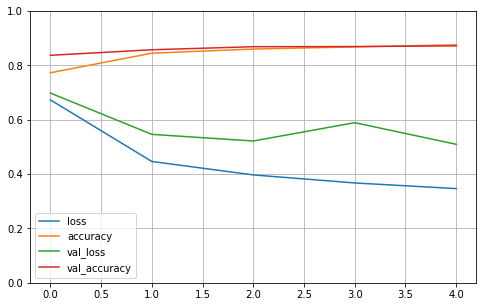

In [11]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

In [12]:
model.evaluate(x_test_scaled, y_test)

10000/10000 [==============================] - 0s 32us/sample - loss: 0.5823 - accuracy: 0.8590


[0.5823176964640617, 0.859]